In [1]:
import numpy as np
import matplotlib.pyplot as plt

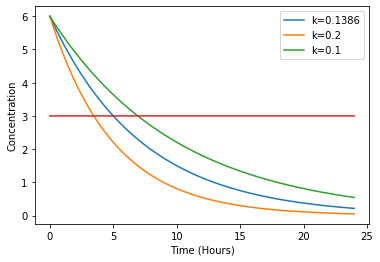

In [2]:
def one_dose(t, k, C0):
    return C0*np.exp(-k*t)

tn = 1*24*60
k = 0.1386/60
k1 = 0.2/60
k2= 0.1/60
C0 = 6

t0 = 0
dt = 1

t = np.arange(t0, tn, dt)
c = one_dose(t, k, C0)
c1 = one_dose(t, k1, C0)
c2 = one_dose(t, k2, C0)
t = t/60

plt.plot(t, c)
plt.plot(t, c1)
plt.plot(t, c2)
plt.plot(t, np.ones(len(t))*3)
plt.xlabel('Time (Hours)')
plt.ylabel('Concentration')
plt.legend(["k=0.1386", "k=0.2", "k=0.1"])
plt.savefig("1a_1.png")
plt.show()

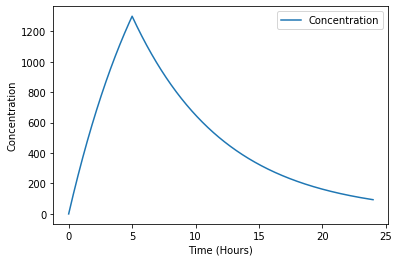

In [3]:
def rect_pulse(t, k, C0, T):
    c = np.zeros(t.shape)
    for i in range(len(t)):
        if t[i] < T:
            c[i] = (C0/k) * (1-np.exp(-k*t[i]))
        else:
            c[i] = (C0/k) * (np.exp(k*T)-1) * (np.exp(-k*t[i]))
    return c

tn = 1*24*60
k = 0.1386/60
C0 = 6
T = 5*60

t0 = 0
dt = 1

t = np.arange(t0, tn, dt)
c = rect_pulse(t, k, C0, T)
t = t/60

plt.plot(t, c)
plt.legend(['Concentration'])
plt.xlabel('Time (Hours)')
plt.ylabel('Concentration')
plt.savefig("1a_2.png")
plt.show()

161.13430193668745 203.46477456525352 118.80382930812137


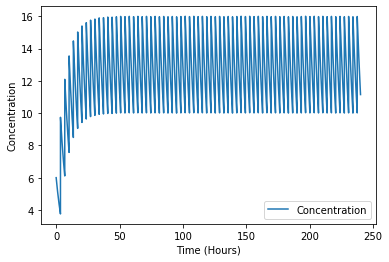

In [4]:
def pulse_train(t, k, C0, T):
    c = np.zeros(t.shape)
    for i in range(len(t)):
        n = np.floor(t[i]/T).astype(int)
        c[i] = C0 * np.exp(-k*t[i]) * ( (np.exp((n+1)*k*T)-1) / (np.exp(k*T)-1) )
    return c

tn = 10*24*60
k = 0.1386/60
C0 = 6
min_lim, max_lim = 10, 25

T_min = (1/k) * np.log((min_lim+C0) / min_lim)
T_max = (1/k) * np.log(max_lim / (max_lim-C0))

T = (T_min+T_max) / 2
print(T, T_min, T_max)

C_min = C0 / (np.exp(k*T)-1)
C_max = C0 / (1-np.exp(-k*T))

t0 = 0
dt = 1

t = np.arange(t0, tn, dt)
c = pulse_train(t, k, C0, T_min)
t = t/60

plt.plot(t, c)
plt.legend(['Concentration'])
plt.xlabel('Time (Hours)')
plt.ylabel('Concentration')
plt.savefig("1b.png")
plt.show()

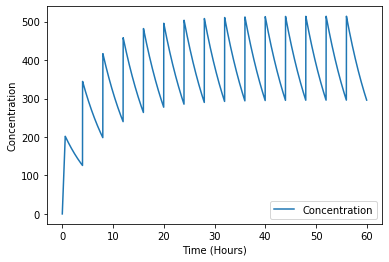

In [5]:
def rect_train(t, k, C0, T, tau):
    c = np.zeros(t.shape)
    for i in range(len(c)):
        n = np.floor(t[i]/T).astype(int)
        if t[i] < n*k*T + tau:
            c[i] = (C0/k) * np.exp(-k*t[i]) * (np.exp(k*tau)-1) * ( (np.exp(n*k*T)-1) / (np.exp(k*T)-1) )
            c[i] += (C0/k) * ( 1-np.exp(-k*(t[i]-n*T)) )
        else:
            c[i] = (C0/k) * np.exp(-k*t[i]) * (np.exp(k*tau)-1) * ( (np.exp((n+1)*k*T)-1) / (np.exp(k*T)-1) )
    return c
    

tn = 2.5*24*60
k = 0.1386/60
C0 = 6
T = 4*60
tau = 35

t0 = 0
dt = 1

t = np.arange(t0, tn, dt)
c = rect_train(t, k, C0, T, tau)
t = t/60

plt.plot(t, c)
plt.legend(['Concentration'])
plt.xlabel('Time (Hours)')
plt.ylabel('Concentration')
plt.savefig("1.png")
plt.show()

In [21]:
############# G-I TRACT PRESENT / 2 COMPARTMENT MODEL ###############

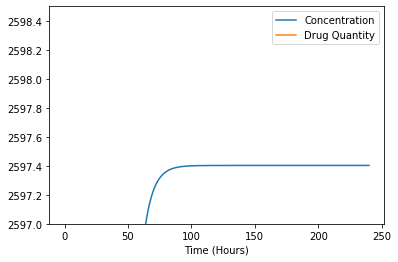

In [32]:
def gitract2(t, k, k1, C0, Q0, T):
    c = np.zeros(t.shape)
    x = np.zeros(t.shape)
    x[0] = C0
    dt = t[1]-t[0]
    I = Q0
    for i in range(1, len(t)):
        x[i] = x[i-1] - k1*x[i-1] + I
        c[i] = c[i-1] + k1*x[i-1] - k*c[i-1]
    return x, c


tn = 10*24*60
k = 0.1386/60
k1 = 1.386/60
C0 = 0
Q0 = 6
T = 2*tn # simulating step function

t0 = 0
dt = 1

t = np.arange(t0, tn, dt)
d, c = gitract2(t, k, k1, C0, Q0, T)
t = t/60

plt.plot(t, c, t, d)
plt.legend(['Concentration', 'Drug Quantity'])
plt.xlabel('Time (Hours)')
plt.savefig("1d.png")
plt.ylim([2597, 2598.5])
plt.show()

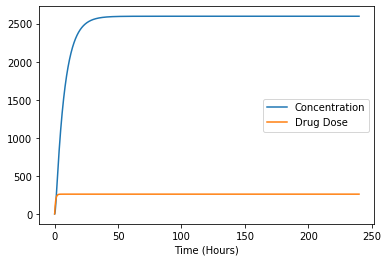

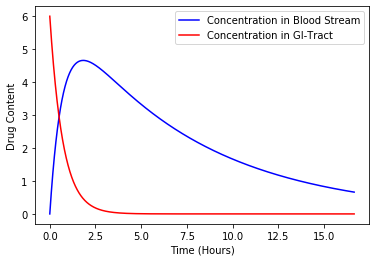

In [18]:
def rect_pulse_gitract(t, k, k1, C0, Q0, T):
    c = np.zeros(t.shape)
    c[0] = C0
    dt = t[1]-t[0]
    
    d = rect_pulse(t, k1, Q0, T)
    
    for i in range(1, len(t)):
        c[i] = c[i-1] + (-k*c[i-1] + k1*d[i])*dt
    
    return d, c


def gitract(t, k, k1, C0):
    x = np.zeros(t.shape)
    x[0] = C0
    c = np.zeros(t.shape)
    dt = t[1]-t[0]
    for i in range(1, len(t)):
        x[i] = x[i-1] - k1*x[i-1]
        c[i] = c[i-1] + k1*x[i-1] - k*c[i-1]
    return c, x
        
tn = 10*24*60
k = 0.1386/60
k1 = 1.386/60
C0 = 0
Q0 = 6
T = 2*tn # simulating step function

t0 = 0
dt = 1

t = np.arange(t0, tn, dt)
d, c = rect_pulse_gitract(t, k, k1, C0, Q0, T)
t = t/60

plt.plot(t, c, t, d)
plt.legend(['Concentration', 'Drug Dose'])
plt.xlabel('Time (Hours)')
plt.savefig("1d1.png")
plt.show()

C0 = 6
t = t[:1000]
c, x = gitract(t, k, k1, C0)
plt.plot(t, c, 'b', t, x, 'r')
plt.xlabel('Time (Hours)')
plt.ylabel('Drug Content')
plt.legend(['Concentration in Blood Stream', 'Concentration in GI-Tract'])
plt.savefig('1d_1.png')

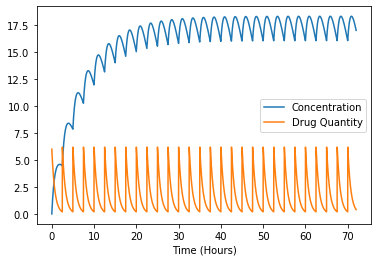

In [23]:
def pulse_train_gitract(t, k, k1, C0, Q0, T):
    c = np.zeros(t.shape)
    c[0] = C0
    dt = t[1]-t[0]
    
    d = pulse_train(t, k1, Q0, T)
    
    for i in range(1, len(t)):
        c[i] = c[i-1] + (-k*c[i-1] + k1*d[i])*dt
    
    return d, c

tn = 3*24*60
k = 0.1386/60
k1 = 1.386/60
C0 = 0
Q0 = 6
T = 150

t0 = 0
dt = 1

t = np.arange(t0, tn, dt)
d, c = pulse_train_gitract(t, k, k1, C0, Q0, T)
t = t/60

plt.plot(t, c, t, d)
plt.legend(['Concentration', 'Drug Quantity'])
plt.xlabel('Time (Hours)')
plt.savefig("1e.png")
plt.show()

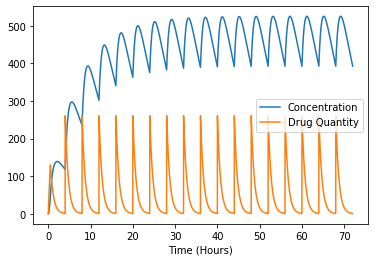

In [8]:
def rect_train_gitract(t, k, k1, C0, Q0, T, tau):
    c = np.zeros(t.shape)
    c[0] = C0
    dt = t[1]-t[0]
    
    d = rect_train(t, k1, Q0, T, tau)
    
    for i in range(1, len(t)):
        c[i] = c[i-1] + (-k*c[i-1] + k1*d[i])*dt
    
    return d, c



tn = 3*24*60
k = 0.1386/60
k1 = 1.386/60
C0 = 0
Q0 = 6
T = 4*60
tau = 30

t0 = 0
dt = 1

t = np.arange(t0, tn, dt)
d, c = rect_train_gitract(t, k, k1, C0, Q0, T, tau)
t = t/60

plt.plot(t, c, t, d)
plt.legend(['Concentration', 'Drug Quantity'])
plt.xlabel('Time (Hours)')
plt.savefig("1f.png")
plt.show()

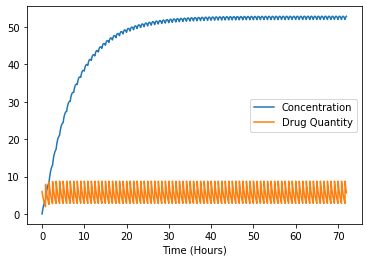

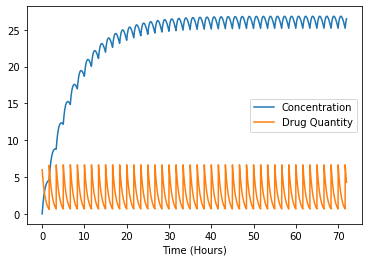

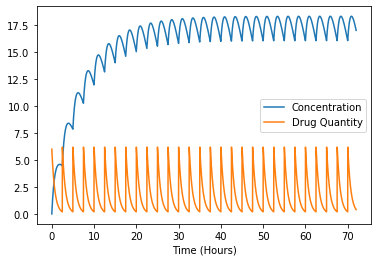

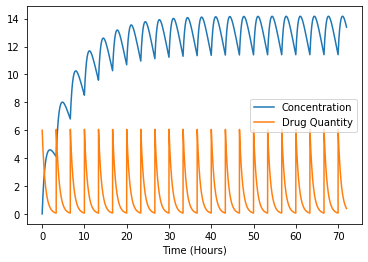

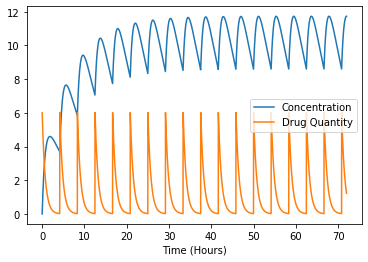

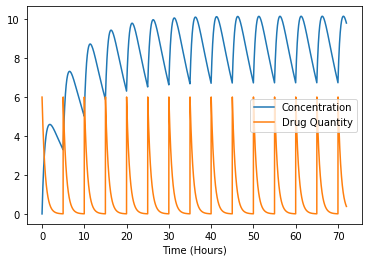

In [37]:
def pulse_train_gitract(t, k, k1, C0, Q0, T):
    c = np.zeros(t.shape)
    c[0] = C0
    dt = t[1]-t[0]
    
    d = pulse_train(t, k1, Q0, T)
    
    for i in range(1, len(t)):
        c[i] = c[i-1] + (-k*c[i-1] + k1*d[i])*dt
    
    return d, c

tn = 3*24*60
k = 0.1386/60
k1 = 1.386/60
C0 = 0
Q0 = 6
tt = [50, 100, 150, 200, 250, 300]
for T in tt:

    t0 = 0
    dt = 1

    t = np.arange(t0, tn, dt)
    d, c = pulse_train_gitract(t, k, k1, C0, Q0, T)
    t = t/60

    plt.plot(t, c, t, d)
    plt.legend(['Concentration', 'Drug Quantity'])
    plt.xlabel('Time (Hours)')
    #plt.savefig("1e.png")
    plt.show()